# Linear_reg_KNN

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')

In [2]:
df= pd.read_csv('Linear_Regression.csv')
df.drop('Unnamed: 0',axis=1 , inplace=True)
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [3]:
from sklearn.model_selection import train_test_split
import statsmodels.api as sm 

X= df.drop('sales',axis=1)
y=df.sales

X_train , X_test , y_train , y_test = train_test_split(X,y, test_size=0.2 , random_state= 40 )

X_train = sm.add_constant(X_train)
result = sm.OLS(y_train, X_train).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.920
Model:                            OLS   Adj. R-squared:                  0.919
Method:                 Least Squares   F-statistic:                     598.6
Date:                Sun, 21 Jun 2020   Prob (F-statistic):           2.48e-85
Time:                        01:53:40   Log-Likelihood:                -288.50
No. Observations:                 160   AIC:                             585.0
Df Residuals:                     156   BIC:                             597.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.2572      0.299     10.906      0.000       2.667       3.847
TV             0.0440      0.001     31.330      0.000       0.041       0.047
radio          0.1951      0.008     23.140      0.000       0.178       0.212
newspaper     -0.0035      0.006     -0.590      0.556      -0.015       0.008
==============================================================================
Omnibus:                       14.981   Durbin-Watson:                   1.873
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               16.537
Skew:                          -0.777   Prob(JB):                     0.000257
Kurtosis:                       3.256   Cond. No.                         436.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

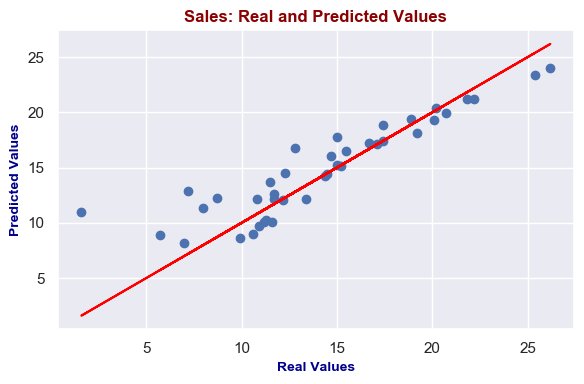

Root Mean Squared Error (RMSE)                : 2.355
Root Mean Squared Error (RMSE) of Train Set   : 1.468


In [4]:
from sklearn.metrics import mean_squared_error ,r2_score
from statsmodels.tools.eval_measures import mse, rmse
X_test = sm.add_constant(X_test)
y_preds = result.predict(X_test)
X_train= sm.add_constant(X_train)
y_preds_train = result.predict(X_train)

baslik_font = {'family': 'arial','color':  'darkred','weight': 'bold','size': 12 }
eksen_font = {'family': 'arial','color':  'darkblue','weight': 'bold','size': 10 }
plt.figure(dpi = 100)

sns.set(color_codes=True)
plt.scatter(y_test, y_preds)
plt.plot(y_test, y_test, color="red")
plt.xlabel("Real Values", fontdict=eksen_font)
plt.ylabel("Predicted Values", fontdict=eksen_font)
plt.title("Sales: Real and Predicted Values", fontdict=baslik_font)
plt.tight_layout()
plt.show()

print("Root Mean Squared Error (RMSE)                : {:.3f}".format(rmse(y_test, y_preds)))
print("Root Mean Squared Error (RMSE) of Train Set   : {:.3f}".format(rmse(y_train, y_preds_train)))

# Scikit Learn Model

In [5]:
from sklearn.linear_model import LinearRegression

X= df.drop('sales',axis=1)
y=df.sales

X_train , X_test , y_train , y_test = train_test_split(X,y, test_size=0.2 , random_state= 40 )

lm = LinearRegression()
result = lm.fit(X_train, y_train)

In [6]:
from sklearn.model_selection import train_test_split, cross_val_score ,cross_val_predict
cross_val_score(result, X , y , cv= 10, scoring="r2").mean() # Rsquared 

0.8853562237979616

In [7]:
np.sqrt(-cross_val_score(result, X_train , y_train , cv= 10, scoring="neg_mean_squared_error")).mean() # Train Errors -- RMSE VALUES -- 

1.4939738053806084

In [8]:
np.sqrt(-cross_val_score(result, X_test , y_test , cv= 10, scoring="neg_mean_squared_error")).mean() # Test Errors -- RMSE VALUES --  

2.107250748030921

# The Best Model Linear

In [9]:
X= df.drop('sales',axis=1)
y=df.sales

In [10]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
X_scl=scaler.fit_transform(X)

In [11]:
from sklearn.metrics import mean_squared_error,r2_score,explained_variance_score,max_error
from sklearn.linear_model import LinearRegression
def Linear_create_model(X,y,tip):
    X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=0.20, random_state=111)
    lm= LinearRegression()
    lm.fit(X_train, y_train)
    
    prediction_train=lm.predict(X_train)
    prediction_test=lm.predict(X_test)
    
    
    
    d = pd.Series({'mean_squared_error_train':mean_squared_error(y_train,prediction_train),
                   'mean_squared_error_test':mean_squared_error(y_test,prediction_test),
                   'RMSE Train':np.sqrt(mean_squared_error(y_train,prediction_train)),
                   'RMSE Test':np.sqrt(mean_squared_error(y_test,prediction_test)),
                   'r2_score_train':r2_score(y_train,prediction_train),
                   'r2_score_test':r2_score(y_test,prediction_test),
                   'explained_variance_score_train':explained_variance_score(y_train,prediction_train),
                   'explained_variance_score_test':max_error(y_test,prediction_test),
                   'max_error_train':max_error(y_train,prediction_train),
                   'max_error_test':max_error(y_test,prediction_test)},name=tip)
    return d

In [12]:
Best_Model = pd.DataFrame()
Best_Model= Best_Model.append(Linear_create_model(X_scl,y,tip='Linear_Model'))

In [13]:
Best_Model

,RMSE Test,RMSE Train,explained_variance_score_test,explained_variance_score_train,max_error_test,max_error_train,mean_squared_error_test,mean_squared_error_train,r2_score_test,r2_score_train
Linear_Model,2.422354,1.435396,9.225817,0.910178,9.225817,5.323189,5.867797,2.060362,0.864951,0.910178


# Alternative Way

In [14]:
from sklearn.metrics import mean_squared_error
# Train error
y_pred = result.predict(X_train)
np.sqrt(mean_squared_error(y_train, y_pred))

1.4684262158442327

In [15]:
# Test Error
y_pred = result.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

2.354765610255833

# KNN Model

## KNN UnWeighted

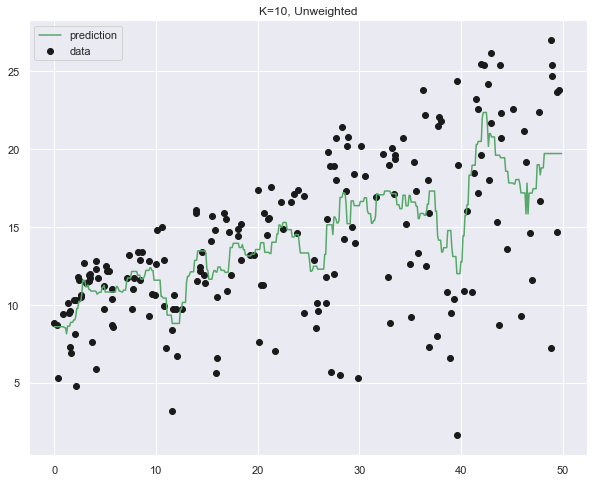

In [16]:
from sklearn import neighbors

# Build our model.
knn = neighbors.KNeighborsRegressor(n_neighbors=10)
X = pd.DataFrame(df.radio)
y = df.sales
knn.fit(X, y)

# Set up our prediction line.
T = np.arange(0, 50, 0.1)[:, np.newaxis]

# Trailing underscores are a common convention for a prediction.
Y_ = knn.predict(T)
plt.figure(figsize=(10,8))
plt.scatter(X, y, c='k', label='data')
plt.plot(T, Y_, c='g', label='prediction')
plt.legend()
plt.title('K=10, Unweighted')
plt.show()

# KNN Weighted

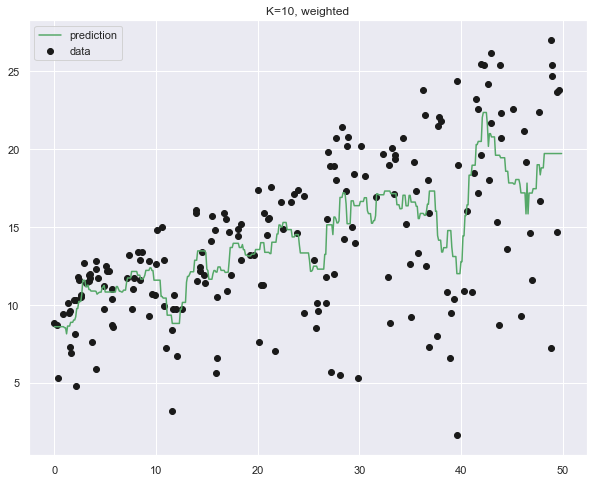

In [17]:
# Build our model.
knn_w = neighbors.KNeighborsRegressor(n_neighbors=10, weights='distance')
X = pd.DataFrame(df.radio)
y = df.sales
knn.fit(X, y)

# Set up our prediction line.
T = np.arange(0, 50, 0.1)[:, np.newaxis]

# Trailing underscores are a common convention for a prediction.
Y_ = knn.predict(T)
plt.figure(figsize=(10,8))
plt.scatter(X, y, c='k', label='data')
plt.plot(T, Y_, c='g', label='prediction')
plt.legend()
plt.title('K=10, weighted')
plt.show()

In [18]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(knn, X, y, cv=5)
print("Unweighted Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))
score_w = cross_val_score(knn_w, X, y, cv=5)
print("Weighted Accuracy: %0.2f (+/- %0.2f)" % (score_w.mean(), score_w.std() * 2))

Unweighted Accuracy: 0.27 (+/- 0.40)
Weighted Accuracy: -0.05 (+/- 0.68)


In [19]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
Knn=neighbors.KNeighborsRegressor()
k_range = list(range(1,25))
parameter = dict(n_neighbors=k_range)
grid = GridSearchCV(Knn, parameter, cv=10, scoring='r2')
Grds = grid.fit(X,y)
print('The best parameters:', Grds.best_estimator_)
print('The best score:', Grds.best_score_)

The best parameters: KNeighborsRegressor(n_neighbors=13)
The best score: 0.2956709453299836


In [20]:
metrics= pd.DataFrame()
metrics['radio']=Grds.best_estimator_,Grds.best_score_

# For TV Unweighted

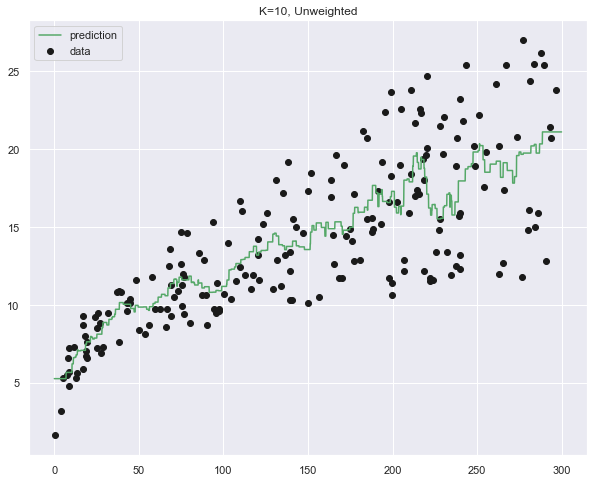

In [21]:
# Build our model.
knn = neighbors.KNeighborsRegressor(n_neighbors=10)
X = pd.DataFrame(df.TV)
y = df.sales
knn.fit(X, y)

# Set up our prediction line.
T = np.arange(0, 300, 0.1)[:, np.newaxis]

# Trailing underscores are a common convention for a prediction.
Y_ = knn.predict(T)
plt.figure(figsize=(10,8))
plt.scatter(X, y, c='k', label='data')
plt.plot(T, Y_, c='g', label='prediction')
plt.legend()
plt.title('K=10, Unweighted')
plt.show()

# TV Weighted

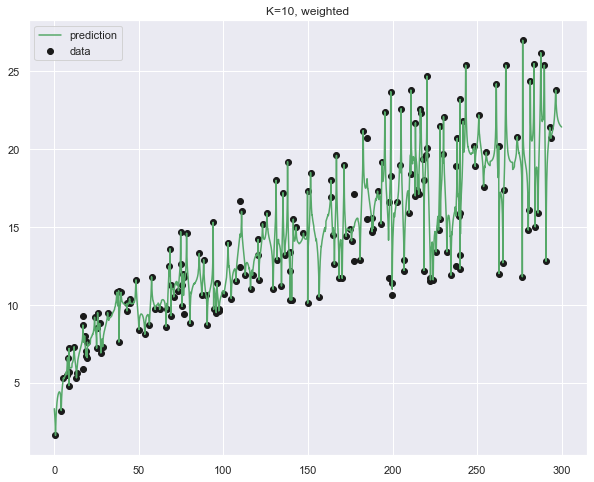

In [22]:
knn = neighbors.KNeighborsRegressor(n_neighbors=10, weights='distance')
X = pd.DataFrame(df.TV)
y = df.sales
knn.fit(X, y)

# Set up our prediction line.
T = np.arange(0, 300, 0.1)[:, np.newaxis]

# Trailing underscores are a common convention for a prediction.
Y_ = knn.predict(T)
plt.figure(figsize=(10,8))
plt.scatter(X, y, c='k', label='data')
plt.plot(T, Y_, c='g', label='prediction')
plt.legend()
plt.title('K=10, weighted')
plt.show()

In [23]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
Knn=neighbors.KNeighborsRegressor()
k_range = list(range(1,25))
parameter = dict(n_neighbors=k_range)
grid = GridSearchCV(Knn, parameter, cv=10, scoring='r2')
Grds = grid.fit(X,y)
print('The best parameters:', Grds.best_estimator_)
print('The best score:', Grds.best_score_)

The best parameters: KNeighborsRegressor(n_neighbors=19)
The best score: 0.5655836455704475


In [24]:
metrics['TV']=Grds.best_estimator_,Grds.best_score_

# For Newspaper Unweighted

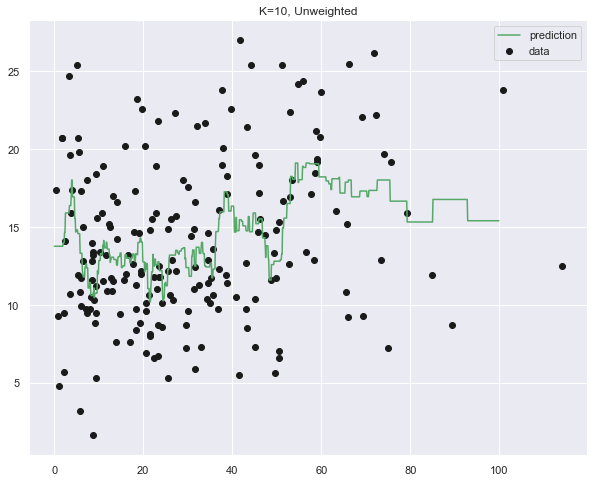

In [25]:
# Build our model.
knn = neighbors.KNeighborsRegressor(n_neighbors=10)
X = pd.DataFrame(df.newspaper)
y = df.sales
knn.fit(X, y)

# Set up our prediction line.
T = np.arange(0, 100, 0.1)[:, np.newaxis]

# Trailing underscores are a common convention for a prediction.
Y_ = knn.predict(T)
plt.figure(figsize=(10,8))
plt.scatter(X, y, c='k', label='data')
plt.plot(T, Y_, c='g', label='prediction')
plt.legend()
plt.title('K=10, Unweighted')
plt.show()

# For Newspaper weighted

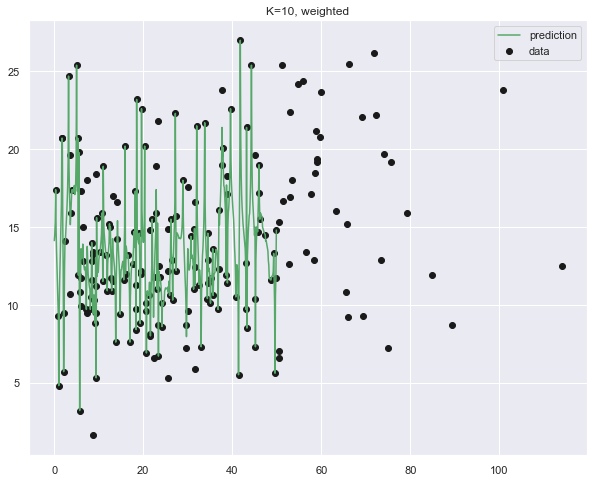

In [26]:
knn = neighbors.KNeighborsRegressor(n_neighbors=10, weights='distance')
X = pd.DataFrame(df.newspaper)
y = df.sales
knn.fit(X, y)

# Set up our prediction line.
T = np.arange(0, 50, 0.1)[:, np.newaxis]

# Trailing underscores are a common convention for a prediction.
Y_ = knn.predict(T)
plt.figure(figsize=(10,8))
plt.scatter(X, y, c='k', label='data')
plt.plot(T, Y_, c='g', label='prediction')
plt.legend()
plt.title('K=10, weighted')
plt.show()

In [27]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
Knn=neighbors.KNeighborsRegressor()
k_range = list(range(1,25))
parameter = dict(n_neighbors=k_range)
grid = GridSearchCV(Knn, parameter, cv=10, scoring='r2')
Grds = grid.fit(X,y)
print('The best parameters:', Grds.best_estimator_)
print('The best score:', Grds.best_score_)

The best parameters: KNeighborsRegressor(n_neighbors=24)
The best score: 0.00042205473726698585


In [28]:
metrics['newspaper']=Grds.best_estimator_,Grds.best_score_
metrics

,radio,TV,newspaper
0,KNeighborsRegressor(n_neighbors=13),KNeighborsRegressor(n_neighbors=19),KNeighborsRegressor(n_neighbors=24)
1,0.295671,0.565584,0.000422055


# Best KNN Model

In [29]:
X= df.drop('sales',axis=1)
y=df.sales

In [30]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
X_scl=scaler.fit_transform(X)

In [31]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
Knn=KNeighborsRegressor()
k_range = list(range(1,25))
parameter = dict(n_neighbors=k_range)
grid = GridSearchCV(Knn, parameter, cv=10, scoring='r2')
Grds = grid.fit(X,y)
print('The best parameters:', Grds.best_estimator_)
print('The best score:', Grds.best_score_)

The best parameters: KNeighborsRegressor(n_neighbors=4)
The best score: 0.9241529689086523


In [32]:
from sklearn.metrics import mean_squared_error,r2_score,explained_variance_score,max_error
from sklearn.neighbors import KNeighborsRegressor
def Knn_create_model(X,y,tip):
    X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=0.20, random_state=111)
    Knn = KNeighborsRegressor(n_neighbors=4)
    Knn.fit(X_train, y_train)
    
    prediction_train=Knn.predict(X_train)
    prediction_test=Knn.predict(X_test)
    
    
    
    d = pd.Series({'mean_squared_error_train':mean_squared_error(y_train,prediction_train),
                   'mean_squared_error_test':mean_squared_error(y_test,prediction_test),
                   'RMSE Train':np.sqrt(mean_squared_error(y_train,prediction_train)),
                   'RMSE Test':np.sqrt(mean_squared_error(y_test,prediction_test)),
                   'r2_score_train':r2_score(y_train,prediction_train),
                   'r2_score_test':r2_score(y_test,prediction_test),
                   'explained_variance_score_train':explained_variance_score(y_train,prediction_train),
                   'explained_variance_score_test':max_error(y_test,prediction_test),
                   'max_error_train':max_error(y_train,prediction_train),
                   'max_error_test':max_error(y_test,prediction_test)},name=tip)
    return d

In [33]:
Best_Model=Best_Model.append(Knn_create_model(X_scl,y,tip='Knn_Model'))

In [34]:
Best_Model

,RMSE Test,RMSE Train,explained_variance_score_test,explained_variance_score_train,max_error_test,max_error_train,mean_squared_error_test,mean_squared_error_train,r2_score_test,r2_score_train
Linear_Model,2.422354,1.435396,9.225817,0.910178,9.225817,5.323189,5.867797,2.060362,0.864951,0.910178
Knn_Model,2.032109,0.865227,8.200000,0.967369,8.200000,3.225000,4.129469,0.748617,0.904959,0.967364


# CART MODEL

In [35]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
cart_model = DecisionTreeRegressor()

X= df.drop('sales',axis=1)
y=df.sales

scaler= StandardScaler()
X_scl= scaler.fit_transform(X)

X_train, X_test , y_train , y_test = train_test_split(X_scl ,y, test_size = 0.2 , random_state = 50)

cart_model.fit(X_train,y_train)

DecisionTreeRegressor()

In [36]:
test_preds = cart_model.predict(X_test)
train_preds = cart_model.predict(X_test)

In [37]:
def metric(x,y):
    print("mean_squared_error: {}".format(mean_squared_error(x,y)))
    print('r2_score   : {}'.format(r2_score(x,y)))
    print("explained_variance_score : {}".format(explained_variance_score(x,y)))
    print("max_error       : {}".format(max_error(x,y)))
metric(y_test,test_preds)

mean_squared_error: 0.6620000000000001
r2_score   : 0.9535042975163077
explained_variance_score : 0.9540117468372211
max_error       : 2.0


# GridSearch Optimize

In [38]:
cart_params= {'min_samples_split':range(2,20), 
             "max_leaf_nodes":range(2,10),
             "max_features":range(0,5)}

cart_cv_model = GridSearchCV(cart_model, cart_params, cv=10)

cart_cv_model.fit(X_train,y_train)
cart_cv_model.best_params_

{'max_features': 3, 'max_leaf_nodes': 9, 'min_samples_split': 2}

In [39]:
from sklearn.metrics import mean_squared_error,r2_score,explained_variance_score,max_error
from sklearn.tree import DecisionTreeRegressor
def Cart_create_model(X,y,tip):
    X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=0.20, random_state=111)
    cart_model = DecisionTreeRegressor(max_features=3 , max_leaf_nodes=9 , min_samples_split=14 )
    cart_model.fit(X_train, y_train)
    
    prediction_train=cart_model.predict(X_train)
    prediction_test=cart_model.predict(X_test)
    
    
    
    d = pd.Series({'mean_squared_error_train':mean_squared_error(y_train,prediction_train),
                   'mean_squared_error_test':mean_squared_error(y_test,prediction_test),
                   'RMSE Train':np.sqrt(mean_squared_error(y_train,prediction_train)),
                   'RMSE Test':np.sqrt(mean_squared_error(y_test,prediction_test)),
                   'r2_score_train':r2_score(y_train,prediction_train),
                   'r2_score_test':r2_score(y_test,prediction_test),
                   'explained_variance_score_train':explained_variance_score(y_train,prediction_train),
                   'explained_variance_score_test':max_error(y_test,prediction_test),
                   'max_error_train':max_error(y_train,prediction_train),
                   'max_error_test':max_error(y_test,prediction_test)},name=tip)
    return d

In [40]:
Best_Model=Best_Model.append(Cart_create_model(X_scl,y,tip='Cart_Model'))
Best_Model

,RMSE Test,RMSE Train,explained_variance_score_test,explained_variance_score_train,max_error_test,max_error_train,mean_squared_error_test,mean_squared_error_train,r2_score_test,r2_score_train
Linear_Model,2.422354,1.435396,9.225817,0.910178,9.225817,5.323189,5.867797,2.060362,0.864951,0.910178
Knn_Model,2.032109,0.865227,8.200000,0.967369,8.200000,3.225000,4.129469,0.748617,0.904959,0.967364
Cart_Model,1.654691,1.248771,5.352632,0.932017,5.352632,3.752632,2.738001,1.559429,0.936984,0.932017
